In [1]:
import pandas as pd
import sqlite3
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load all data as dataframes
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
title_basics= pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', '\t')
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', '\t', encoding='windows-1252')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [3]:
#Reformat movie_budgets['production_budget'] as int64
movie_budgets['production_budget'] = movie_budgets['production_budget'].map(lambda x: x.strip('$'))
movie_budgets['production_budget'] = movie_budgets['production_budget'].map(lambda x: x.replace(',', ''))
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype('int64')
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(2), object(4)
memory usage: 271.2+ KB


In [4]:
#Reformat movie_budgets['domestic_gross'] as int64
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].map(lambda x: x.strip('$'))
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].map(lambda x: x.replace(',', ''))
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype('int64')
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   object
dtypes: int64(3), object(3)
memory usage: 271.2+ KB


In [5]:
#Reformat movie_budgets['worldwide_gross'] as int64
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].map(lambda x: x.strip('$'))
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].map(lambda x: x.replace(',', ''))
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype('int64')
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [6]:
#create new column for the month of release
movie_budgets['release_month'] = movie_budgets['release_date'].apply(lambda x: x[:3])

In [7]:
#create profit column
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Dec,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Jun,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,999721747


In [8]:
#introduce pandas query function
pysqldf = lambda q: sqldf(q, globals())

In [16]:
#create DataFrame from multiple df's with introduced query function
table1 = pysqldf('''select original_title, primary_title, primary_name, production_budget, worldwide_gross, genres, category, runtime_minutes, averagerating, numvotes, profit, release_month
                    from movie_budgets mb
                    join title_basics tb
                    on mb.movie == tb.primary_title
                    join title_principals
                    using(tconst)
                    join title_ratings
                    using (tconst)
                    join name_basics
                    using(nconst)''')

In [11]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27145 entries, 0 to 27144
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     27145 non-null  object 
 1   primary_title      27145 non-null  object 
 2   primary_name       27145 non-null  object 
 3   production_budget  27145 non-null  int64  
 4   worldwide_gross    27145 non-null  int64  
 5   genres             27085 non-null  object 
 6   category           27145 non-null  object 
 7   runtime_minutes    26168 non-null  float64
 8   averagerating      27145 non-null  float64
 9   numvotes           27145 non-null  int64  
 10  profit             27145 non-null  int64  
 11  release_month      27145 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [12]:
table.head()

,original_title,primary_title,primary_name,production_budget,worldwide_gross,genres,category,runtime_minutes,averagerating,numvotes,profit,release_month
0,Abatâ,Avatar,Ai Hashimoto,425000000,2776345279,Horror,actress,93.0,6.1,43,2351345279,Dec
1,Abatâ,Avatar,Yûsuke Yamada,425000000,2776345279,Horror,writer,93.0,6.1,43,2351345279,Dec
2,Abatâ,Avatar,Rikako Sakata,425000000,2776345279,Horror,actress,93.0,6.1,43,2351345279,Dec
3,Abatâ,Avatar,Nako Mizusawa,425000000,2776345279,Horror,actress,93.0,6.1,43,2351345279,Dec
4,Abatâ,Avatar,Hideki Ikari,425000000,2776345279,Horror,composer,93.0,6.1,43,2351345279,Dec


In [96]:
filter_category_sort = table[(table['category'] == 'actress') | (table['category'] == 'actor')].groupby(['primary_name']).profit 
filter_category_sort

In [83]:
filter_category_sort[filter_category_sort['pirmary_name'].nunique() > 10]

KeyError: 'Column not found: pirmary_name'

In [ ]:
filter_actors_fewer_10 = filter_category_sort[(filter_category_sort['primary_title'].nunique() > 10)].profit
category_profit_mean = filter_actors_fewer_10.mean().sort_values(by = 'profit', ascending = False)[:50]
category_profit_mean

<BarContainer object of 50 artists>

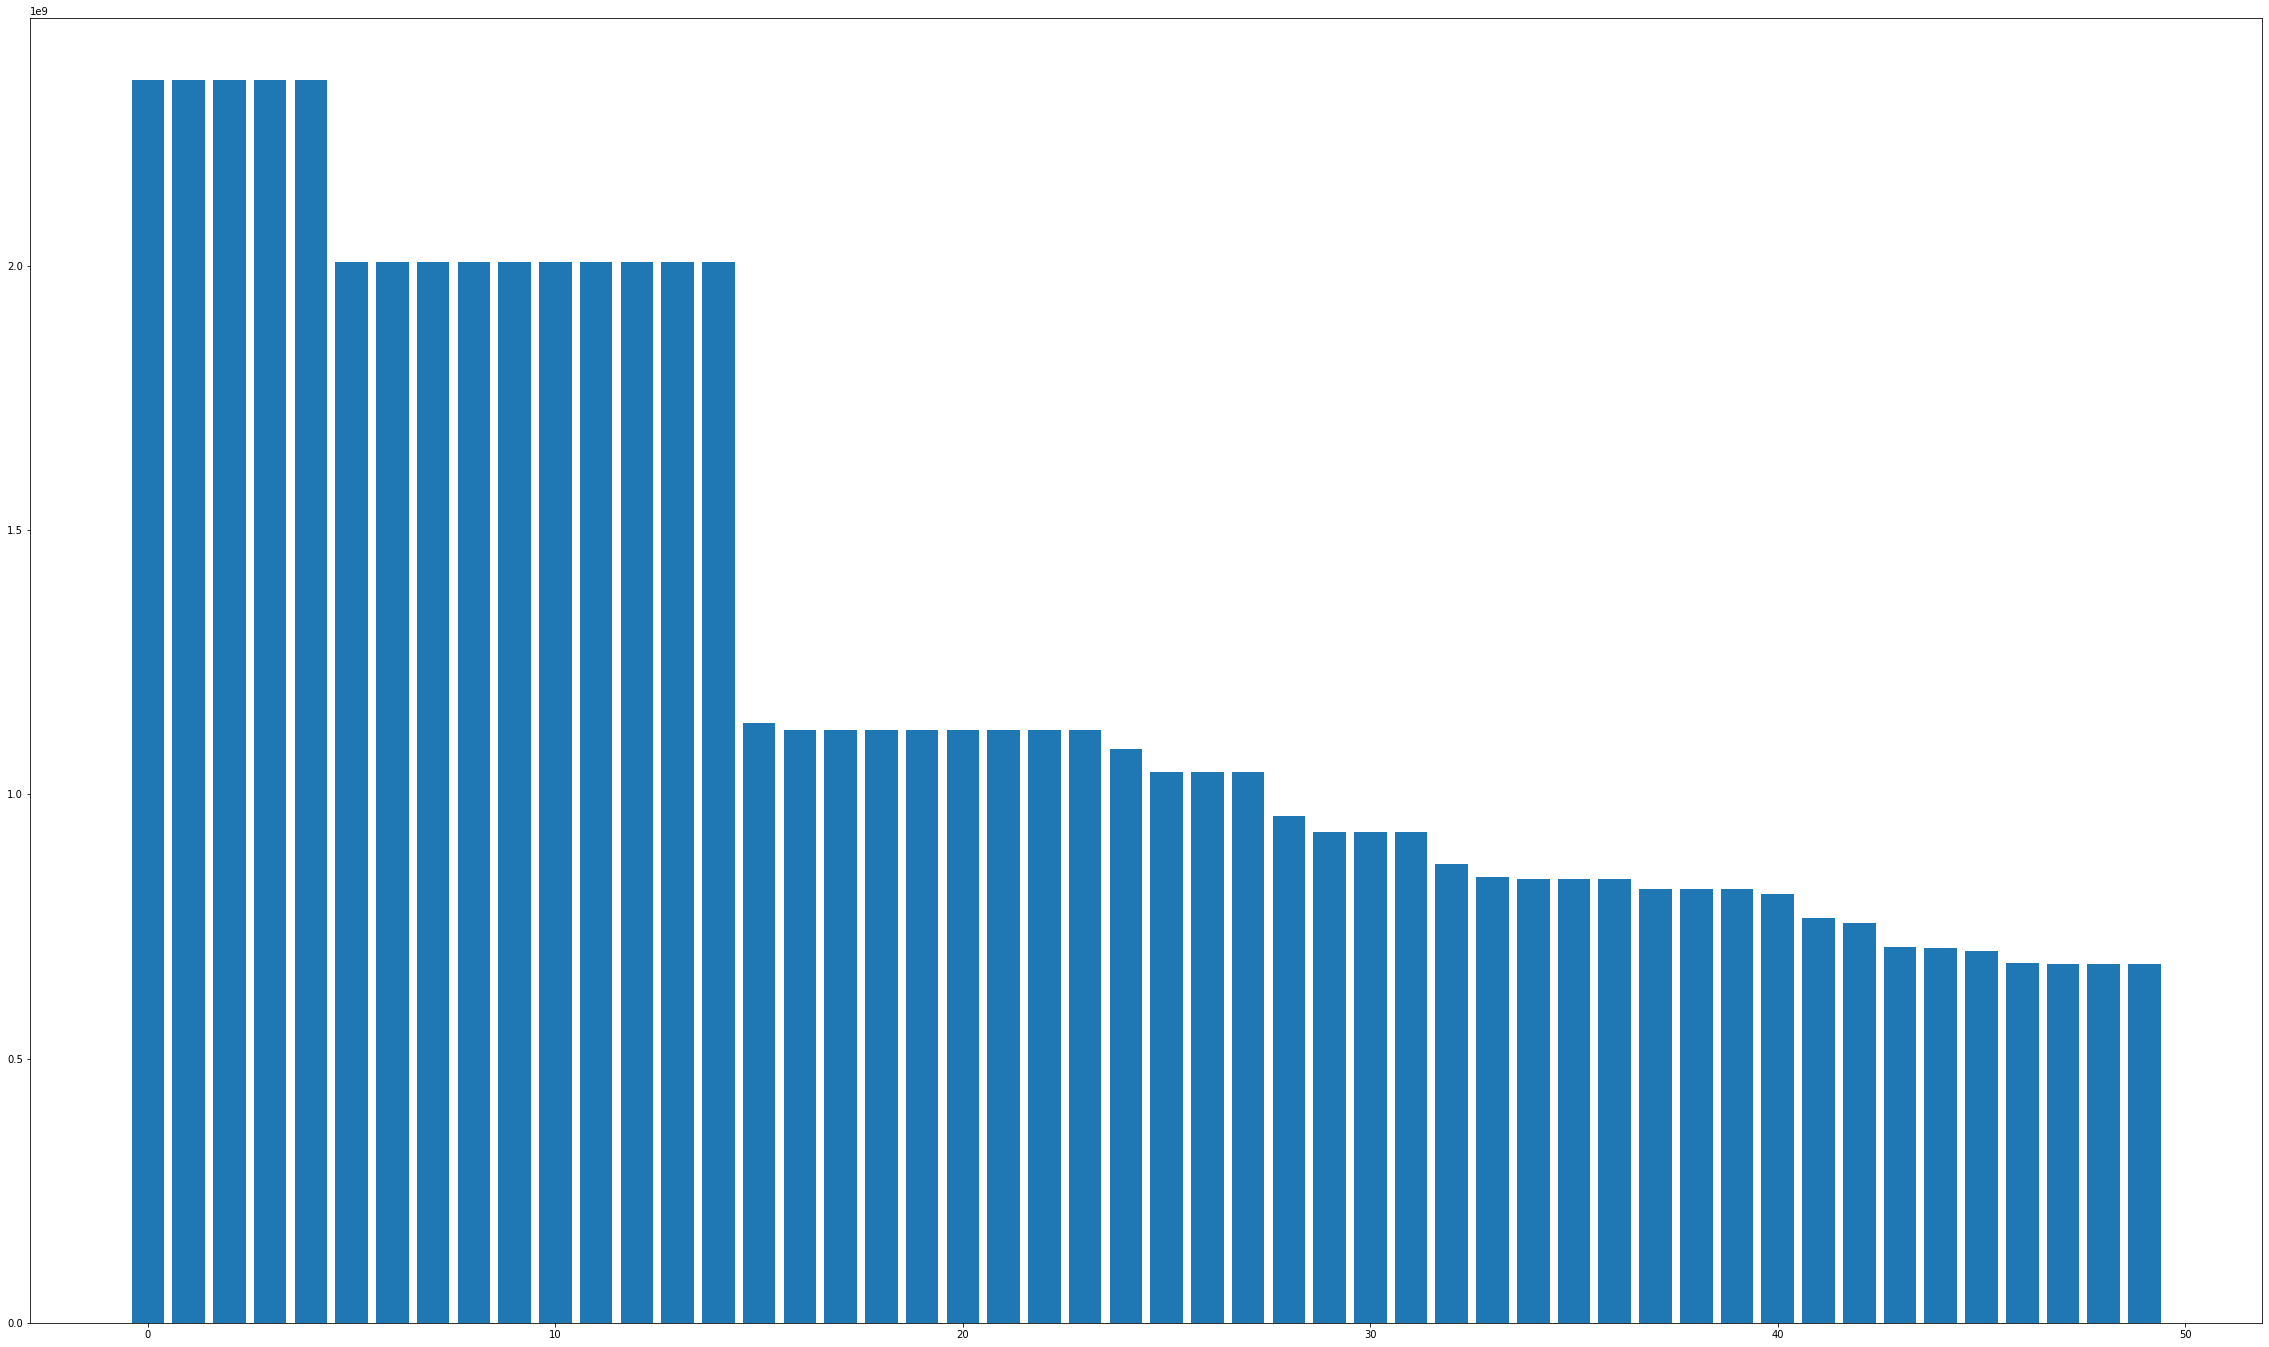

In [72]:
fig, axes = plt.subplots(figsize = (40, 24))
axes.bar(np.arange(len(category_profit_mean)), category_profit_mean)

In [15]:
table['category'].unique()

array(['actress', 'writer', 'composer', 'cinematographer', 'director',
       'actor', 'producer', 'editor', 'production_designer', 'self',
       'archive_sound', 'archive_footage'], dtype=object)

In [19]:
y = table[(table['category'] == 'actress') | (table['category'] == 'actor')].groupby(['primary_name']).nunique()
y = y[y['original_title'] > 10].primary_name

In [51]:
avg_profit_min_10 = pysqldf('''select primary_name, avg(profit), count(primary_name)
           from table1
           group by primary_name
           having count(primary_title) > 10 and (category == 'actor' or category == 'actress')  
           order by avg(profit) desc
           limit 25''')
avg_profit_min_10

,primary_name,avg(profit),count(primary_name)
0,Robert Downey Jr.,7.043069e+08,11
1,Chris Evans,4.500985e+08,13
2,Dwayne Johnson,3.299972e+08,19
3,Chris Hemsworth,3.259375e+08,14
4,Scarlett Johansson,3.251085e+08,12
5,Cate Blanchett,2.717379e+08,12
6,Kristen Wiig,2.685787e+08,12
7,Anne Hathaway,2.576601e+08,13
8,Jennifer Lawrence,2.414328e+08,15
9,Jason Statham,2.366514e+08,13


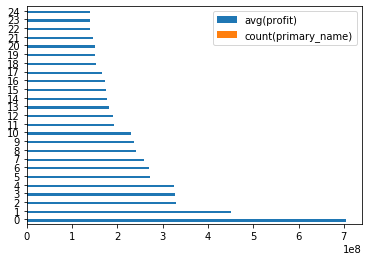

In [53]:
avg_profit_min_10.plot(kind = 'barh')